In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [24]:
X = crime_df_norm.iloc[:,:]

In [10]:
# Normalized data frame (considering the numerical part of data)
crime_df_norm = norm_func(crime_data.iloc[:,1:])
crime_df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


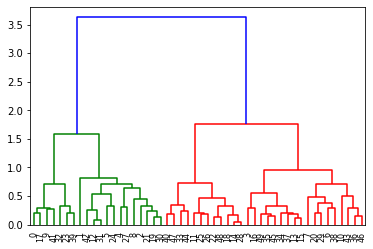

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_df_norm, method='ward'))

In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

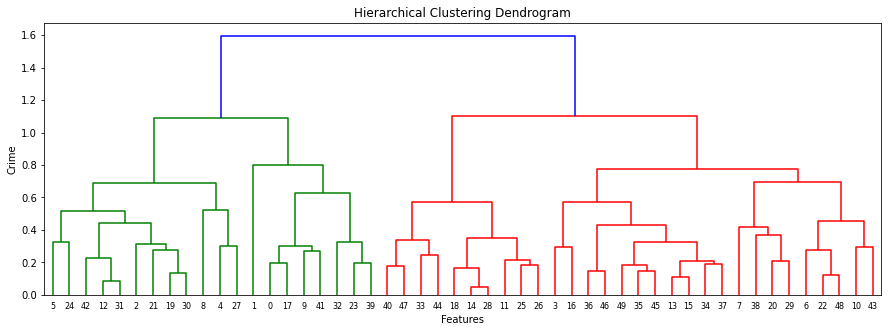

In [14]:
z = linkage(crime_df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [15]:
crime_data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [20]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
hc1.fit_predict(crime_df_norm)

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [21]:
# We have five labels in the output that is 0 to 3.
# Here we can see the cluster labels from of our data points,Since we had four clusters.

In [17]:
# save clusters for chart
y_hc = hc1.fit_predict(crime_df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [19]:
Clusters.head()

,Clusters
0,3
1,1
2,1
3,0
4,1


In [22]:
crime_data['h_clusterid'] = hc1.labels_
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [25]:
### KMeans clustering ###

In [27]:
from sklearn.cluster import KMeans


In [31]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime_data.iloc[:,1:])

In [28]:
# How to find optimum number of  cluster
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:


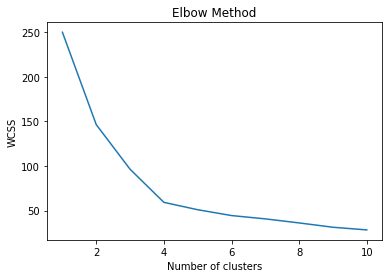

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
clusters_new.labels_

array([3, 0, 0, 2, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [36]:
#Assign clusters to the data set
crime_data['clusterid_new'] = clusters_new.labels_
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,0


In [37]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383, -0.15022315],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413,  0.78867155],
       [-0.40179755, -0.37217475,  0.40430025, -0.27487043, -1.08911786],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ,  1.72756626]])

In [38]:
crime_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308,1
1,1,3.091667,76.000000,52.083333,11.833333,2
2,2,6.055556,140.055556,71.333333,18.683333,0
3,3,14.671429,251.285714,54.285714,21.685714,3


In [39]:
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,0
5,Colorado,7.9,204,78,38.7,1,0
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,1,0
9,Georgia,17.4,211,60,25.8,3,3


In [40]:
## DBSCAN Clustering ##
from sklearn.cluster import DBSCAN

In [49]:
stscaler = StandardScaler().fit(X)
x = stscaler.transform(X)

In [50]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(x)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [51]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0])

In [52]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [53]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [55]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [56]:
#Assign clusters to the data set
crime_data['clusterid_new'] = dbscan.labels_
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,3,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,0,-1
4,California,9.0,276,91,40.6,1,-1
